<a href="https://colab.research.google.com/github/Tanjul5/World-Bank-Education-EDA-capston-1/blob/main/World_Bank_Global_Education_Group_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**</u>World Bank Global Education Group**</u>

#### The world bank global Education group is the largest financier of education. It's main strategy is focused on <b>"learning for all".</b>

##### Now talk's about what is world bank and what is the purpose of global education....

## <b>What is World Bank?<b>

* The World Bank is an international organization dedicated to providing financing, advice, and research to developing nations to aid their economic advancement. The bank predominantly acts as an organization that attempts to fight poverty by offering developmental assistance to middle- and low-income countries.

##  <b>What is the purpose of Global Education?</b>

The main purpose is opening a global dimension and a holistic perspective in education in order to help and understand the complex realities, develope values, knowledge and skills that enable them to face the challenges.


### Let's take a look at the problem statement

### <b>The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.<b>
Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.

let's get into this and filtering out the ideas...

<b>First to import all the libraries<b>

In [76]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax
%matplotlib inline

##### Let's Mount the Drive and analyse the data...

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


######Now First, try to evaluate all the Datasets and, it's relevance with the problem...

In [78]:
working_path = '/content/drive/MyDrive/Colab Notebooks'

Working path of all the datasets..

In [79]:
Edstats_country_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsCountry.csv')
Edstats_country_series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsCountry-Series.csv')
Edstats_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsData.csv')
Edstats_footnotes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsFootNote.csv')
Edstats_series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsSeries.csv')

##<b>EdStats Data

Well, that's almost a million records. So, here we can see quite a lot of them are NaN, and some are years that exceed even 2020. So from here, we can assume that those years are nothing but predictions.
We will now account for those years that have passed the limit of 1999 and ignore the predictions as they might affect our analyses.

In [80]:
Edstats_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [81]:
Edstats_data_df.shape

(886930, 70)

In [82]:
Edstats_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
Edstats_data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [84]:
Edstats_data_df.describe

<bound method NDFrame.describe of        Country Name Country Code  ... 2100 Unnamed: 69
0        Arab World          ARB  ...  NaN         NaN
1        Arab World          ARB  ...  NaN         NaN
2        Arab World          ARB  ...  NaN         NaN
3        Arab World          ARB  ...  NaN         NaN
4        Arab World          ARB  ...  NaN         NaN
...             ...          ...  ...  ...         ...
886925     Zimbabwe          ZWE  ...  NaN         NaN
886926     Zimbabwe          ZWE  ...  NaN         NaN
886927     Zimbabwe          ZWE  ...  NaN         NaN
886928     Zimbabwe          ZWE  ...  NaN         NaN
886929     Zimbabwe          ZWE  ...  NaN         NaN

[886930 rows x 70 columns]>

Let's check Edstats Country Series data....

##<b>EdStats Country Series<b>

Contains repeated data....

In [85]:
Edstats_country_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [86]:
Edstats_country_series_df.shape

(613, 4)

In [87]:
Edstats_country_series_df.groupby("SeriesCode").first().reset_index()

,SeriesCode,CountryCode,DESCRIPTION,Unnamed: 3
0,NY.GDP.MKTP.PP.CD,AFG,Estimates are based on regression.,NaN
1,NY.GDP.MKTP.PP.KD,AFG,Estimates are based on regression.,NaN
2,NY.GDP.PCAP.CD,CYP,Data are for areas under the effective control...,NaN
3,NY.GDP.PCAP.KD,CYP,Data are for areas under the effective control...,NaN
4,NY.GDP.PCAP.PP.CD,AFG,Estimates are based on regression.,NaN
5,NY.GDP.PCAP.PP.KD,AFG,Estimates are based on regression.,NaN
6,NY.GNP.MKTP.PP.CD,AFG,Estimates are based on regression.,NaN
7,NY.GNP.PCAP.CD,CYP,Data are for areas under the effective control...,NaN
8,NY.GNP.PCAP.PP.CD,AFG,Estimates are based on regression.,NaN
9,SP.POP.0014.FE.IN,GEO,Derived using ratio of age group from WPP and ...,NaN


In [88]:
list(Edstats_country_series_df.columns)

['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']

In both of these datasets, Unnamed Columns were present with all null values. In this we, also analyze that column 'Country Code' and 'Series Code' were given in that Country code is similar but Series Code has some different values in it. Just keep checking further to have more analysis.

##<b>EdStats Series Data<b>

I Can see a different column named 'Topic'. Just check this column if it would contain some information related to the Indicator name.

In [89]:
Edstats_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [90]:
Edstats_series_df.shape

(3665, 21)

In [91]:
Edstats_series_df.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
Edstats_series_df.tail()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All the Indicators name with the topic....

In [93]:
sample_df=Edstats_series_df.groupby(['Topic']).first()
for i in sample_df["Indicator Name"]:
  print(i)

Barro-Lee: Percentage of female population age 15-19 with no education
Duration of compulsory education (years)
Africa Dataset: School census return rate from primary schools
SABER: (Early Childhood Development) Policy Goal 1: Establishing an Enabling Environment
Enrolment in pre-primary education, both sexes (number)
GNI per capita, Atlas method (current US$)
GDP (constant 2010 US$)
GDP (current US$)
GDP, PPP (current international $)
DHS: Gross attendance rate. Post Secondary
SABER: (Education Management Information Systems) Policy Goal 1: Enabling Environment
SABER: (Engaging the Private Sector, Government funded) Policy Goal 5: Encouraging innovation by providers
Current expenditure as % of total expenditure in public institutions (%)
Mortality rate, under-5 (per 1,000 live births)
Population growth (annual %)
Population ages 0-14, female
Prevalence of HIV, total (% of population ages 15-49)
Personal computers (per 100 people)
Share of youth not in education, employment or training

## <b>Edstats Country 

In [94]:
Edstats_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [95]:
Edstats_country_df.shape

(241, 32)

In this dataset, we have many different columns name. Just explore some of them to know whether they are related to data or not.

In [96]:
#first one
Edstats_country_df['Balance of Payments Manual in use']

0      IMF Balance of Payments Manual, 6th edition.
1                                               NaN
2      IMF Balance of Payments Manual, 6th edition.
3      IMF Balance of Payments Manual, 6th edition.
4                                               NaN
                           ...                     
236                                             NaN
237    IMF Balance of Payments Manual, 6th edition.
238    IMF Balance of Payments Manual, 6th edition.
239    IMF Balance of Payments Manual, 6th edition.
240    IMF Balance of Payments Manual, 6th edition.
Name: Balance of Payments Manual in use, Length: 241, dtype: object

In [97]:
# second
Edstats_country_df['External debt Reporting status']

0              NaN
1           Actual
2           Actual
3           Actual
4              NaN
          ...     
236         Actual
237         Actual
238    Preliminary
239         Actual
240         Actual
Name: External debt Reporting status, Length: 241, dtype: object

They are not seems to be that much related..... 

##<b> EdStats FootNotes

In [98]:
Edstats_footnotes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [99]:
Edstats_footnotes_df.shape

(643638, 5)

In [100]:
Edstats_footnotes_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


we have analyzed all the datasets and seems that all have Unnamed columns name and many null values columns which need to be drop out to have more clearance on the data...

## <b> Dropping unnamed and null columns<b>

We have to drop all the unnamed and null values columns to clear out the datasets.

In [101]:
Edstats_data_df.drop(['Unnamed: 69'],axis=1,inplace=True)
Edstats_country_series_df.drop(['Unnamed: 3'],axis=1,inplace=True)
Edstats_series_df.drop(['Unnamed: 20','License Type','Related indicators','Other web links'],axis=1,inplace=True)
Edstats_country_df.drop(['Unnamed: 31'],axis=1,inplace=True)
Edstats_footnotes_df.drop(['Unnamed: 4'],axis=1,inplace=True) 

## Now lets check in which year the maximum data is present so we can work on them and use for our further analysis...

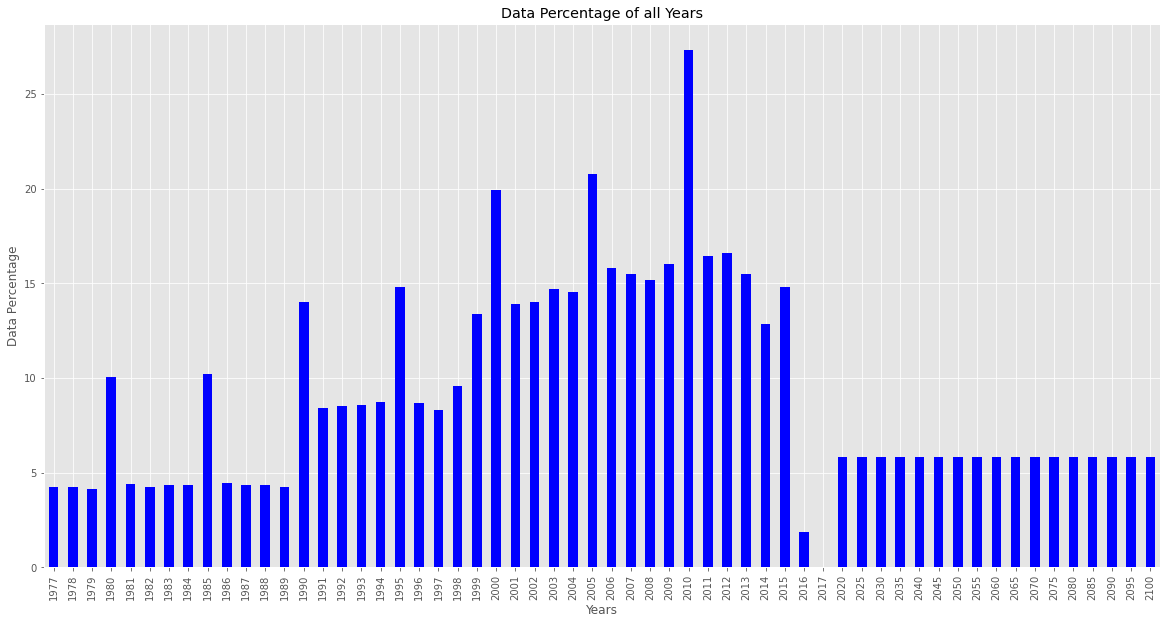

In [102]:
# plotting the bar graph
# Data percentage of all years
data_percentage = Edstats_data_df.loc[:,'1977':'2100'].notnull().sum()/len(Edstats_data_df)*100
plt.figure(figsize=(20,10))
plt.subplot()
data_percentage.plot(kind='bar', color='blue')
plt.title('Data Percentage of all Years')
plt.xlabel('Years')
plt.ylabel('Data Percentage')
plt.show()

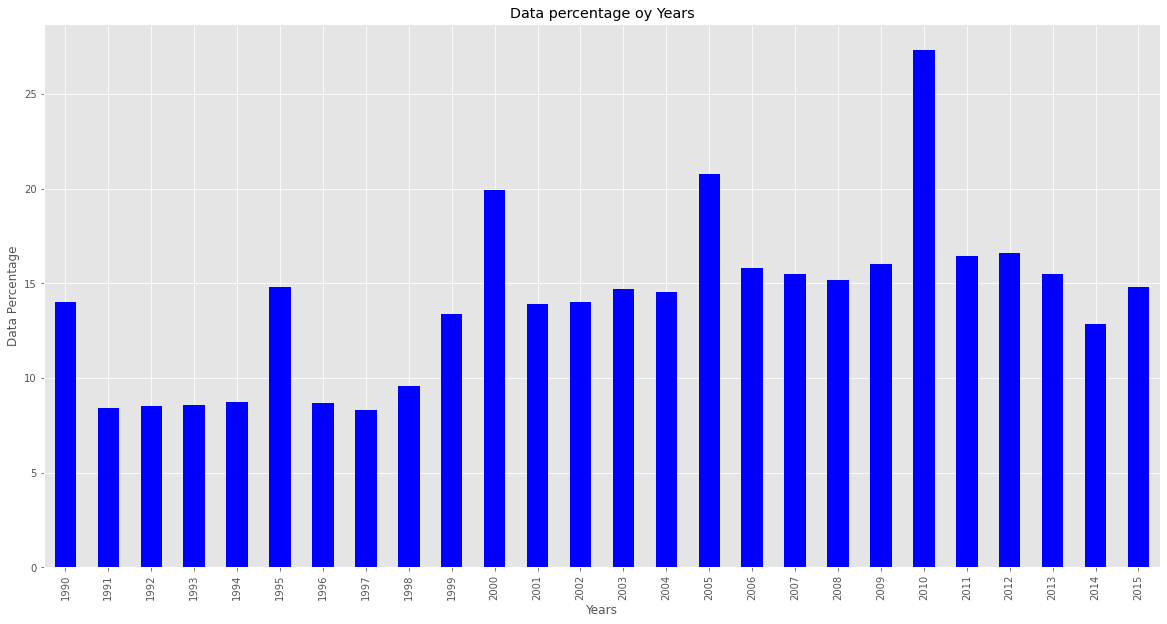

In [103]:
# data percentages of all the years from 1990 to 2015
data_percentage = Edstats_data_df.loc[:,'1990':'2015'].notnull().sum()/len(Edstats_data_df)*100
plt.figure(figsize=(20,10))
plt.subplot()
data_percentage.plot(kind='bar', color='blue')
plt.title('Data percentage oy Years')
plt.xlabel('Years')
plt.ylabel('Data Percentage')
plt.show()

•	The most percentage of present data ranged between 15-30%.

In [104]:
 #Mean of the data percentage per years
 Edstats_data_df.loc[:,'1970':'2100'].notnull().sum()/len(Edstats_data_df)*100

1970    8.150361
1971    4.006742
1972    4.015988
1973    4.007644
1974    4.028503
          ...   
2080    5.799330
2085    5.799330
2090    5.799330
2095    5.799330
2100    5.799330
Length: 65, dtype: float64

#### We notice that mostly data are present in between 1990 to 2015. So as moving forward, fetching all the columns between 1990 to 2015 for further analyses.

In [105]:
column_list = list(Edstats_data_df.columns)

In [106]:
#Figuring out the number of years
#From 2000 to 2015 that is almost a decade
for i in range(len(column_list)):
  if i >33 and i<50:
    print(column_list[i])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


Now, we have the years in which most data were present.

Well after this, try to analysis of all the indicators specifically for one country.

In [107]:
country_grouped=Edstats_data_df.groupby(['Indicator Name','Country Name']).first().reset_index()
country_grouped

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,"Adjusted net enrolment rate, lower secondary, ...",Afghanistan,AFG,UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.260189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Adjusted net enrolment rate, lower secondary, ...",Albania,ALB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.558281,85.306610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.666588,88.778252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Adjusted net enrolment rate, lower secondary, ...",Algeria,DZA,UIS.NERA.2,NaN,9.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.43399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.367668,57.795860,59.062691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Adjusted net enrolment rate, lower secondary, ...",American Samoa,ASM,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Adjusted net enrolment rate, lower secondary, ...",Andorra,AND,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,"Youth literacy rate, population 15-24 years, m...",West Bank and Gaza,PSE,SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.913628,NaN,NaN,NaN,NaN,NaN,NaN,99.024890,NaN,99.039300,99.134160,99.210450,99.232980,99.211350,99.259860,99.345160,99.418830,99.405790,99.41047,99.45153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,"Youth literacy rate, population 15-24 years, m...",World,WLD,SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.827705,87.827705,87.827705,87.827705,87.827705,87.830467,87.827705,87.827705,87.827705,87.827705,90.468765,90.468765,90.468765,90.468765,90.468765,90.470619,90.468765,90.468765,90.468765,90.468765,92.583031,92.583031,92.583031,92.583031,92.583031,92.584358,92.583031,92.583031,92.583031,92.583031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,"Youth literacy rate, population 15-24 years, m...","Yemen, Rep.",YEM,SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.804222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,"Youth literacy rate, population 15-24 years, m...",Zambia,ZMB,SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.269348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.615600,NaN,NaN,

In [108]:
# Analyse the Country data
# At first the Country we consider was china
country_grouped=Edstats_data_df.groupby(['Indicator Name','Country Name']).first().reset_index()
#All indicators for one country :
country_grouped[country_grouped['Country Name']=='China']

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
42,"Adjusted net enrolment rate, lower secondary, ...",China,CHN,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,"Adjusted net enrolment rate, lower secondary, ...",China,CHN,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,"Adjusted net enrolment rate, lower secondary, ...",China,CHN,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,"Adjusted net enrolment rate, lower secondary, ...",China,CHN,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,"Adjusted net enrolment rate, primary, both sex...",China,CHN,SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885762,"Youth illiterate population, 15-24 years, male...",China,CHN,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.120398e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900765e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,820292.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383703.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886004,"Youth literacy rate, population 15-24 years, b...",China,CHN,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.877334e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.428147e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.85873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.64229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886246,"Youth literacy rate, population 15-24 years, f...",China,CHN,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.209922e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.145470e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.50486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.59304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886488,"Youth literacy rate, population 15-24 years, g...",China,CHN,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.623100e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.430600e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Edstats_data_df[['Country Name','Country Code','Indicator Code','1970'	,'1971'	,'1972'	,'1973',	'1974',	'1975'	,'1976',	'1977',	'1978'	,'1979'	,'1980']].tail(20)
# Indicator_list=Edstats_data_df.groupby("Indicator Code")

# Capturing Country names

In [110]:
# Another Country is India
country_grouped=Edstats_data_df.groupby(['Indicator Name','Country Name']).first().reset_index()
#All indicators for one country :
country_grouped[country_grouped['Country Name']=='India']

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
97,"Adjusted net enrolment rate, lower secondary, ...",India,IND,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.614967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,"Adjusted net enrolment rate, lower secondary, ...",India,IND,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.731750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,"Adjusted net enrolment rate, lower secondary, ...",India,IND,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.055220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,"Adjusted net enrolment rate, lower secondary, ...",India,IND,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.716110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,"Adjusted net enrolment rate, primary, both sex...",India,IND,SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.136543,8.406309e+01,83.869987,88.703056,NaN,NaN,NaN,96.96656,96.987038,95.643608,96.19281,9.576299e+01,96.984512,97.738869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885817,"Youth illiterate population, 15-24 years, male...",India,IND,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.438597e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.332878e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.712218e+07,NaN,NaN,NaN,NaN,1.361671e+07,NaN,NaN,NaN,NaN,1.226385e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886059,"Youth literacy rate, population 15-24 years, b...",India,IND,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.378457e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.190028e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.642570e+01,NaN,NaN,NaN,NaN,8.113086e+01,NaN,NaN,NaN,NaN,8.614488e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886301,"Youth literacy rate, population 15-24 years, f...",India,IND,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032152e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.934919e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.774658e+01,NaN,NaN,NaN,NaN,7.435573e+01,NaN,NaN,NaN,NaN,8.184981e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886543,"Youth literacy rate, population 15-24 years, g...",India,IND,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.080300e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.713300e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.046700e-01,NaN,NaN,NaN,NaN,8.410200e-01,NaN,NaN,NaN,NaN,9.089900e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [111]:
# The another is United States
country_grouped=Edstats_data_df.groupby(['Indicator Name','Country Name']).first().reset_index()
#All indicators for one country :
country_grouped[country_grouped['Country Name']=='United States']

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
229,"Adjusted net enrolment rate, lower secondary, ...",United States,USA,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.826241,NaN,NaN,NaN,NaN,NaN,86.579102,87.778664,87.559013,87.504082,NaN,NaN,83.998589,88.595612,89.437630,88.769249,89.478691,87.246819,88.110893,89.472816,88.482422,87.295357,87.366890,86.635513,87.674263,88.243698,88.304207,88.212769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,"Adjusted net enrolment rate, lower secondary, ...",United States,USA,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.211884,NaN,NaN,NaN,NaN,NaN,89.112740,90.243370,90.150139,89.271378,NaN,NaN,NaN,91.836197,91.219971,89.981934,91.522057,91.042961,89.578262,90.280510,90.610687,89.140083,88.792160,89.005142,88.928200,90.263367,89.480652,90.381920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713,"Adjusted net enrolment rate, lower secondary, ...",United States,USA,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.081350,NaN,NaN,NaN,NaN,NaN,1.058350,1.056000,1.059240,1.040160,NaN,NaN,NaN,1.073790,1.039550,1.026920,1.045360,1.088130,1.032880,1.017710,1.047910,1.041970,1.032250,1.054650,1.028230,1.045600,1.026320,1.049170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,"Adjusted net enrolment rate, lower secondary, ...",United States,USA,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.651291,NaN,NaN,NaN,NaN,NaN,84.199463,85.457863,85.108360,85.824341,NaN,NaN,NaN,85.525337,87.749168,87.622887,87.551109,83.669197,86.727112,88.709740,86.468384,85.549408,86.018211,84.392929,86.486900,86.327133,87.185547,86.145897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197,"Adjusted net enrolment rate, primary, both sex...",United States,USA,SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.513893,97.616867,97.311523,96.003258,95.535233,94.436249,95.274330,96.252899,97.172279,97.485748,96.031303,94.795822,93.944641,94.109367,93.825844,94.034531,94.456047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885949,"Youth illiterate population, 15-24 years, male...",United States,USA,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886191,"Youth literacy rate, population 15-24 years, b...",United States,USA,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886433,"Youth literacy rate, population 15-24 years, f...",United States,USA,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [112]:
# Details of all the Indicators including the countries
Edstats_data_df[['Country Name','Country Code','Indicator Code','1970'	,'1971'	,'1972'	,'1973',	'1974',	'1975'	,'1976',	'1977',	'1978'	,'1979'	,'1980']].tail(20)
Indicator_list=Edstats_data_df.groupby("Indicator Code")

 #Capturing Country names
list(Indicator_list)

[('BAR.NOED.1519.FE.ZS',
                                         Country Name Country Code  ... 2095 2100
  276                                      Arab World          ARB  ...  NaN  NaN
  3941                            East Asia & Pacific          EAS  ...  NaN  NaN
  7606    East Asia & Pacific (excluding high income)          EAP  ...  NaN  NaN
  11271                                     Euro area          EMU  ...  NaN  NaN
  14936                         Europe & Central Asia          ECS  ...  NaN  NaN
  ...                                             ...          ...  ...  ...  ...
  868881                        Virgin Islands (U.S.)          VIR  ...  NaN  NaN
  872546                           West Bank and Gaza          PSE  ...  NaN  NaN
  876211                                  Yemen, Rep.          YEM  ...  NaN  NaN
  879876                                       Zambia          ZMB  ...  NaN  NaN
  883541                                     Zimbabwe          ZWE  ...  

Well, we analyzed the countries, that are already well developed, good in population as well and their education statistics also high


### Comparison of the population to the Area's

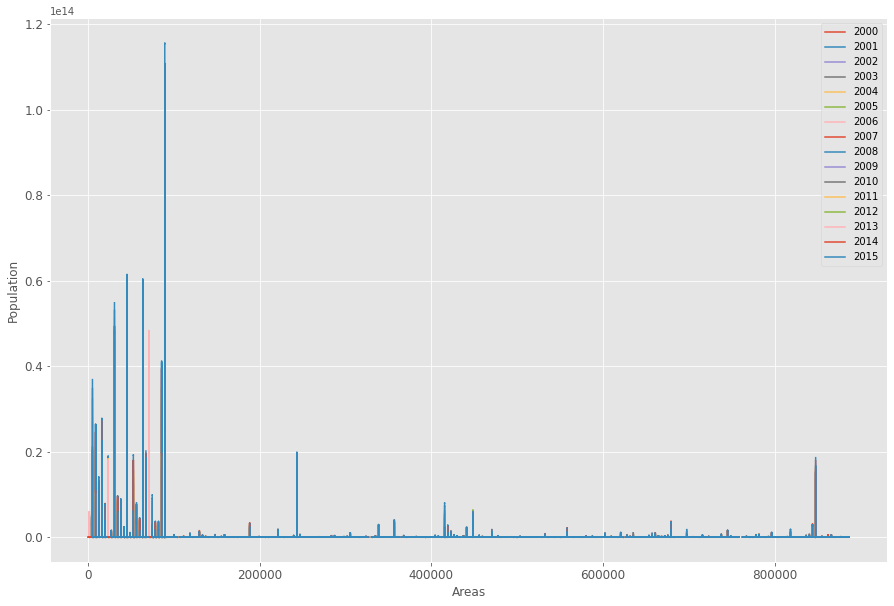

In [113]:
# In the years 2000 to 2015
Comparison_EEd=Edstats_data_df.loc[:,'2000':'2015']
plt.style.use('ggplot')
ax = Comparison_EEd.plot(figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Areas",fontsize=12)
ax.set_ylabel("Population",fontsize=12)
plt.show()

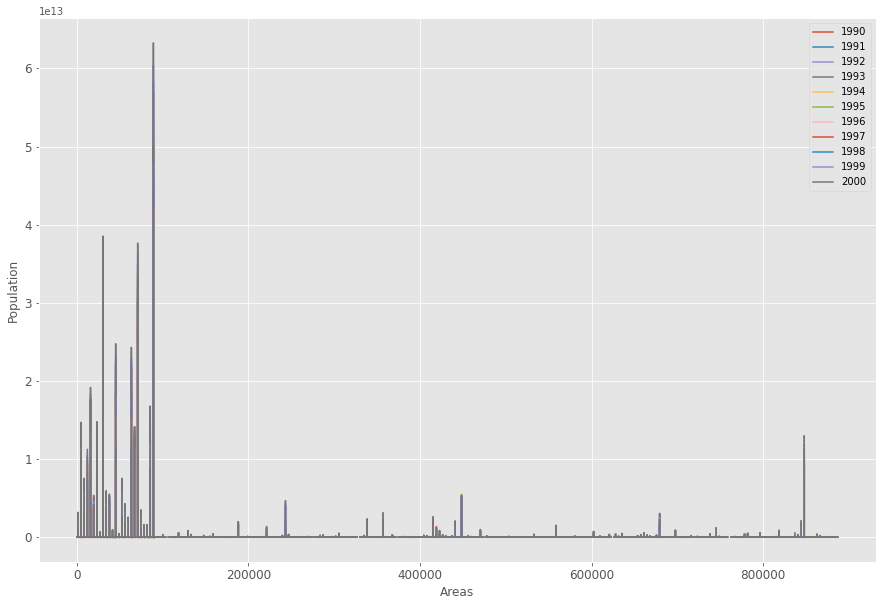

In [114]:
# Comparison of population to the area wise
Comparison_EED=Edstats_data_df.loc[:,'1990':'2000']
plt.style.use('ggplot')
ax = Comparison_EED.plot(figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Areas",fontsize=12)
ax.set_ylabel("Population",fontsize=12)
plt.show()

#### After comparing the population in a particular area on yearly basis, we notice that there are a high population in an area less than 200,00 square meters in a year after 2005.

Now, to evaluate more, we analyze the different countries for one indicator. Because from the above conclusion, we see that all the countries probably have the same indicators name.

Mean value graph of one indicator for different countries

In [115]:
country_graph1=Edstats_data_df[(Edstats_data_df['Country Name'] =='India' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
country_graph1

1970    63.10
1975    62.36
1980    62.50
1985    55.22
1990    45.11
1995    37.21
2000    30.22
2005    12.62
2010    11.09
dtype: float64

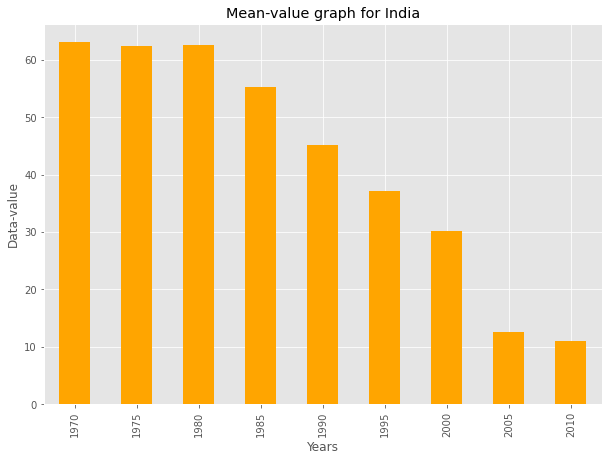

In [116]:
dataset1 = country_graph1
plt.figure(figsize=(10,7))
plt.subplot()
dataset1.plot(kind='bar', color='orange')
plt.title('Mean-value graph for India')
plt.xlabel('Years')
plt.ylabel('Data-value')
plt.show()

In [117]:
country_graph2=Edstats_data_df[(Edstats_data_df['Country Name'] =='Nepal' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
country_graph2

1970    94.40
1975    91.75
1980    89.60
1985    79.10
1990    61.00
1995    56.78
2000    34.86
2005    17.87
2010     6.89
dtype: float64

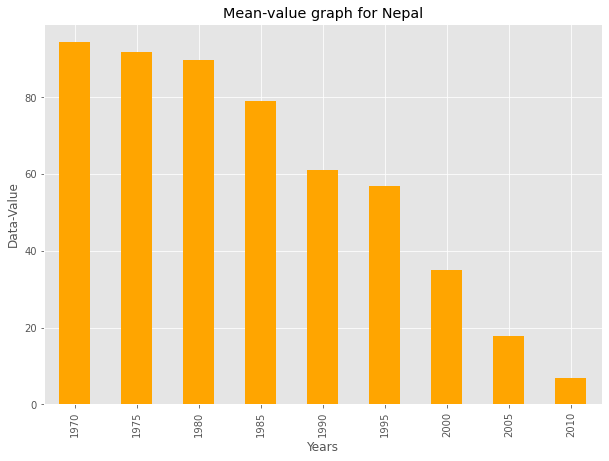

In [118]:
dataset2 = country_graph2
plt.figure(figsize=(10,7))
plt.subplot()
dataset2.plot(kind='bar', color='orange')
plt.title('Mean-value graph for Nepal')
plt.xlabel('Years')
plt.ylabel('Data-Value')
plt.show()

In [119]:
# Mean value for Russian Federation
country_graph3=Edstats_data_df[(Edstats_data_df['Country Name'] =='Russian Federation' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
country_graph3

1970    0.20
1975    0.14
1980    1.39
1985    1.05
1990    0.09
1995    0.30
2000    0.40
2005    0.10
2010    0.58
dtype: float64

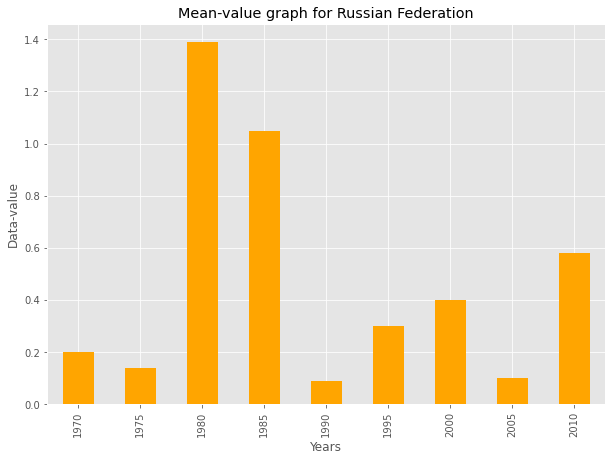

In [120]:
dataset3 = country_graph3
plt.figure(figsize=(10,7))
plt.subplot()
dataset3.plot(kind='bar', color='orange')
plt.title('Mean-value graph for Russian Federation')
plt.xlabel('Years')
plt.ylabel('Data-value')
plt.show()

In [121]:
#country_graph4=Edstats_data_df[(Edstats_data_df['Country Name'] =='Arab World' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
#dataset4 = graph4
#plt.figure(figsize=(10,7))
#plt.subplot()
#dataset4.plot(kind='bar', color='orange')
#plt.title('Mean-value graph for Arab World')
#plt.xlabel('Years')
#plt.ylabel('Data-value')
#plt.show()

After analysing same indicator for countries like India, Nepal and The Russian Federation we see a variation of data in same years....

In [122]:
# for more evaluation
# take another Indicator name for same Countries
country_graph5=Edstats_data_df[(Edstats_data_df['Indicator Code']=='SE.PRM.TENR') & (Edstats_data_df['Country Name'] =='India')] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
country_graph5

2000    84.136543
2001    84.063087
2002    83.869987
2003    88.703056
2007    96.966560
2008    96.987038
2009    95.643608
2010    96.192810
2011    95.762993
2012    96.984512
2013    97.738869
dtype: float64

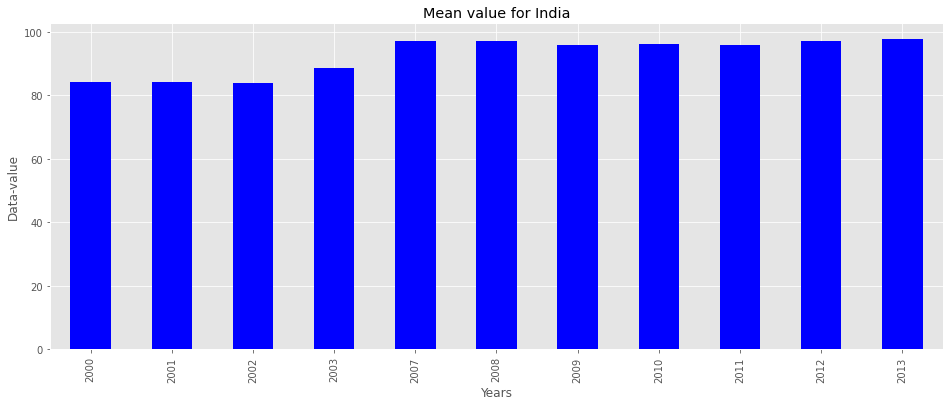

In [123]:
dataset5 = country_graph5
plt.figure(figsize=(16,6))
plt.subplot()
dataset5.plot(kind='bar', color='blue')
plt.title('Mean value for India')
plt.xlabel('Years')
plt.ylabel('Data-value')
plt.show()

In [124]:
country_graph6=Edstats_data_df[(Edstats_data_df['Indicator Code']=='SE.PRM.TENR') & (Edstats_data_df['Country Name'] =='Russian Federation')] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
country_graph6

2006    92.820961
2007    93.554222
2008    94.783173
2009    96.227379
2011    97.266808
2012    97.326767
2013    97.506073
2014    96.212540
2015    97.498802
dtype: float64

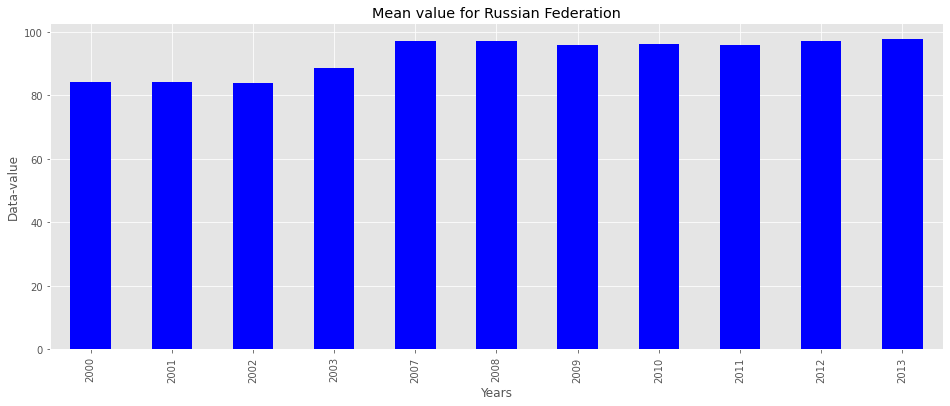

In [125]:
dataset6 = country_graph5
plt.figure(figsize=(16,6))
plt.subplot()
dataset6.plot(kind='bar', color='blue')
plt.title('Mean value for Russian Federation')
plt.xlabel('Years')
plt.ylabel('Data-value')
plt.show()

In [126]:
country_graph7=Edstats_data_df[(Edstats_data_df['Indicator Code']=='SE.PRM.TENR') & (Edstats_data_df['Country Name'] =='Nepal')] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna()
country_graph7

1999    66.324440
2000    72.611870
2003    80.401802
2004    81.085640
2011    98.635094
2012    99.579483
2014    94.661530
2015    97.126549
2016    97.107803
dtype: float64

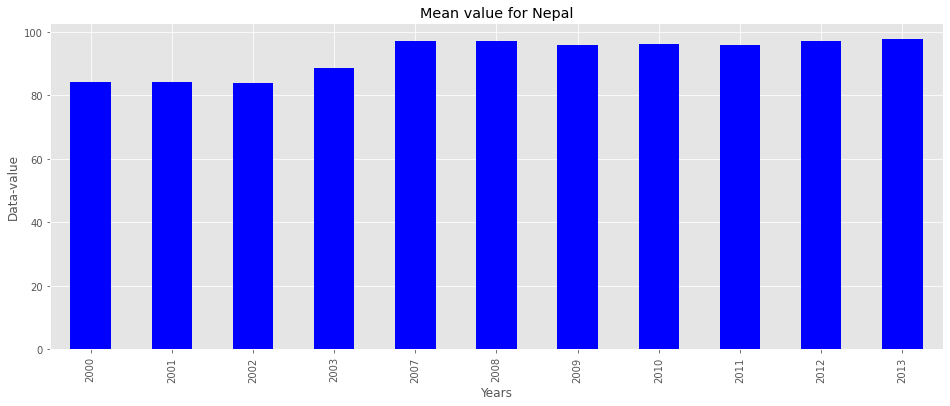

In [127]:
dataset7 = country_graph5
plt.figure(figsize=(16,6))
plt.subplot()
dataset7.plot(kind='bar', color='blue')
plt.title('Mean value for Nepal')
plt.xlabel('Years')
plt.ylabel('Data-value')
plt.show()

From above, it was summarize as that individual Indicator for different countries has different information in distict years......

*   From the above analyses, we concluded that we have many years of data from 1970 to 2100. In this time duration, some are predictions and from 1990 to 2014, we have the highest percentage of data
*   We have also analyzed the individual countries for all Indicator and also analyze, one particular Indicator for all the countries

### Top 5 Indicators

In [128]:
#limited indicators (Top 10)
#Top 5 countries (USA,INDIA,CHINA,RUSSIA,)
#2000 - 2015 (Years)
#Analyses 
#Correlation between indicators 

# Capturing Top 5 Indicator names :

indicator_counts= dict(Counter(Edstats_data_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names
for i in range(len(indicator_names)):
  if "PISA" in indicator_names[i] and "both gender" in indicator_names[i]:
    print(indicator_names[i])

Edstats_data_df[Edstats_data_df["Indicator Name"]==indicator_names[i]]
# Adjusted net enrolment rate, primary, both sexes (%)
# Adjusted net enrolment rate, upper secondary, both sexes (%)
# Adult illiterate population, 15+ years, both sexes (number)
# Adult literacy rate, population 15+ years, both sexes (%)

# Current education expenditure, primary (% of total expenditure in primary public institutions)
# Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)
# Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)
# Primary education, pupils (% female)
# Primary education, teachers (% female)
# Secondary education, general pupils (% female)
# Secondary education, pupils (% female)
# Secondary education, teachers (% female)
# Secondary education, vocational pupils (% female)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
3664,Arab World,ARB,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.003349,82.003349,82.003349,82.003349,82.003349,82.003349,82.003349,82.003349,82.003349,82.003349,87.184212,87.184212,87.184212,87.184212,87.184212,87.184212,87.184212,87.184212,87.184212,87.184212,91.632492,91.632492,91.632492,91.632492,91.632492,91.632492,91.632492,91.632492,91.632492,91.632492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7329,East Asia & Pacific,EAS,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.301979,96.301979,96.301979,96.301979,96.301979,96.301979,96.301979,96.301979,96.301979,96.301979,98.316399,98.316399,98.316399,98.316399,98.316399,98.316399,98.316399,98.316399,98.316399,98.316399,99.060867,99.060867,99.060867,99.060867,99.060867,99.060867,99.060867,99.060867,99.060867,99.060867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10994,East Asia & Pacific (excluding high income),EAP,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.009804,96.009804,96.009804,96.009804,96.009804,96.009804,96.009804,96.009804,96.009804,96.009804,98.212471,98.212471,98.212471,98.212471,98.212471,98.212471,98.212471,98.212471,98.212471,98.212471,99.025879,99.025879,99.025879,99.025879,99.025879,99.025879,99.025879,99.025879,99.025879,99.025879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14659,Euro area,EMU,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18324,Europe & Central Asia,ECS,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.461815,99.461815,99.461815,99.461815,99.461815,99.461815,99.461815,99.461815,99.461815,99.461815,99.499901,99.499901,99.499901,99.499901,99.499901,99.499901,99.499901,99.499901,99.499901,99.499901,99.742554,99.742554,99.742554,99.742554,99.742554,99.742554,99.742554,99.742554,99.742554,99.742554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872269,Virgin Islands (U.S.),VIR,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875934,West Bank and Gaza,PSE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.913628,NaN,NaN,NaN,NaN,NaN,NaN,99.024890,NaN,99.039300,99.134160,99.210450,99.232980,99.211350,99.259860,99.345160,99.418830,99.405790,99.41047,99.45153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

It's time to, analyzing some of the Indicators with the top seven countries together.

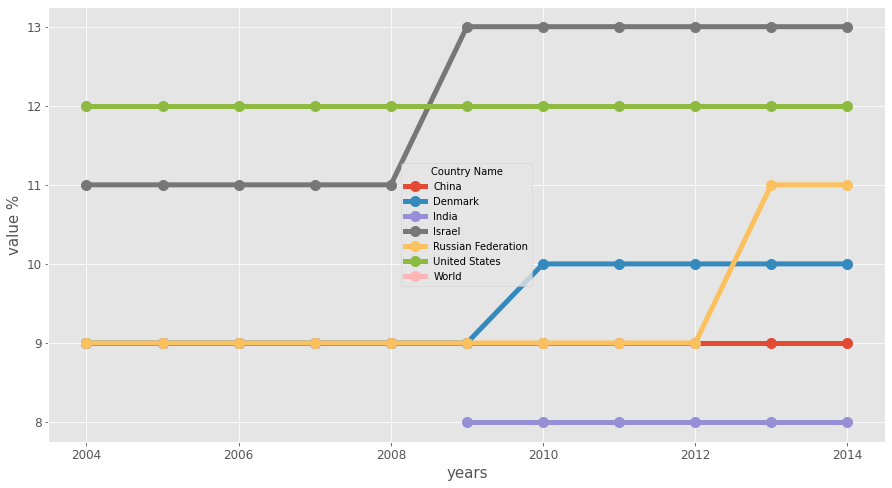

In [129]:
Edstats_data_specific_df=Edstats_data_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
Edstats_data_specific_df=Edstats_data_specific_df[(Edstats_data_df["Country Name"]=='World') | (Edstats_data_df["Country Name"]=='India') | (Edstats_data_df["Country Name"]=='China') 
| (Edstats_data_df["Country Name"]=='United States') | (Edstats_data_df["Country Name"]=='Russian Federation') | (Edstats_data_df["Country Name"]=='Israel') | (Edstats_data_df["Country Name"]=='Denmark')]
df4=Edstats_data_specific_df[Edstats_data_specific_df["Indicator Name"]=='Duration of compulsory education (years)']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].mean()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,8),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=10)
ax.set_xlabel("years",fontsize=15)
ax.set_ylabel("value %",fontsize=15)
plt.show()

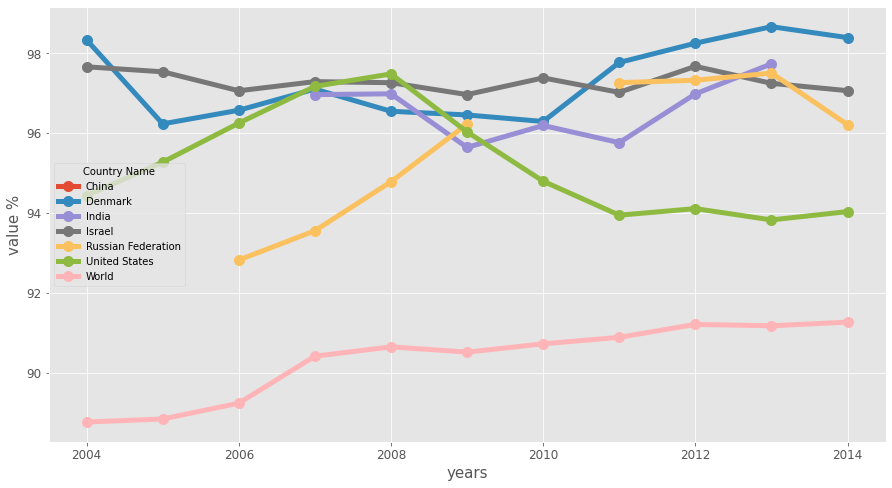

In [130]:
# Another important Indicator
Edstats_data_specific_df=Edstats_data_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
Edstats_data_specific_df=Edstats_data_specific_df[(Edstats_data_df["Country Name"]=='World') | (Edstats_data_df["Country Name"]=='India') | (Edstats_data_df["Country Name"]=='China') 
| (Edstats_data_df["Country Name"]=='United States') | (Edstats_data_df["Country Name"]=='Russian Federation') | (Edstats_data_df["Country Name"]=='Israel') | (Edstats_data_df["Country Name"]=='Denmark')]
df4=Edstats_data_specific_df[Edstats_data_specific_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].mean()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,8),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=10)
ax.set_xlabel("years",fontsize=15)
ax.set_ylabel("value %",fontsize=15)
plt.show()

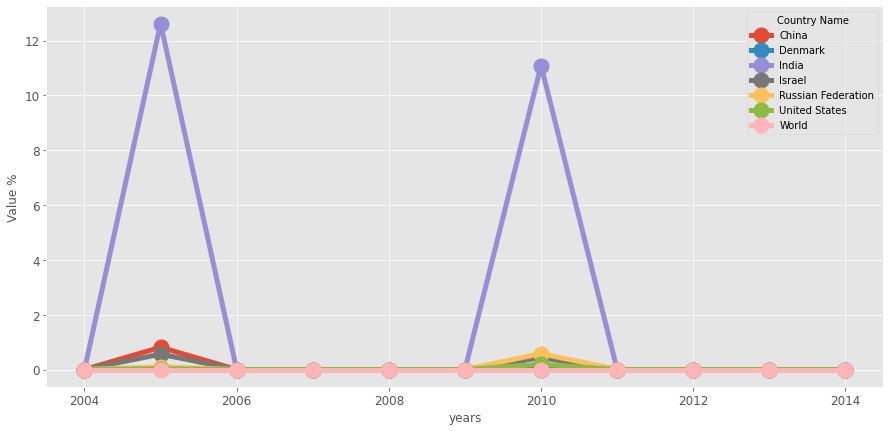

In [131]:
Edstats_data_specific_df=Edstats_data_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
Edstats_data_specific_df=Edstats_data_specific_df[(Edstats_data_df["Country Name"]=='World') | (Edstats_data_df["Country Name"]=='India') | (Edstats_data_df["Country Name"]=='China') 
| (Edstats_data_df["Country Name"]=='United States') | (Edstats_data_df["Country Name"]=='Russian Federation') | (Edstats_data_df["Country Name"]=='Israel') | (Edstats_data_df["Country Name"]=='Denmark')]
df4=Edstats_data_specific_df[Edstats_data_specific_df["Indicator Name"]=='Barro-Lee: Percentage of female population age 15-19 with no education']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].sum()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,7),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=15)
ax.set_xlabel("years",fontsize=12)
ax.set_ylabel("Value %",fontsize=12)
plt.show()

# Barro-Lee: Percentage of female population age 15-19 with no education
# Duration of compulsory education (years)

After all this, we analyse the percentage of data present in between the year 2004 to 2014 for different countries

In [132]:
advanced_df=Edstats_data_df[(Edstats_data_df["Country Name"]=='Arab World') & (Edstats_data_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)')]

advanced_df=advanced_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
india_df=Edstats_data_df[(Edstats_data_df["Country Name"]=='India') & (Edstats_data_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)')]
new_df=advanced_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]

<Figure size 1440x720 with 0 Axes>

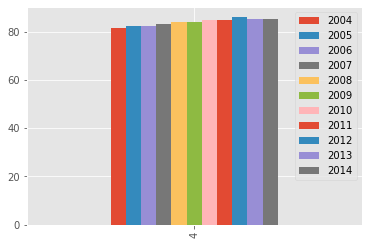

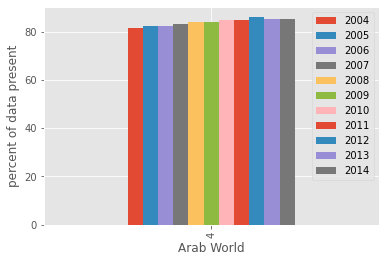

In [133]:
# plt.figure(figsize=(50,5))
# plt.title('Years')
# plt.ylabel('Percent of data present')
# plt.show()
EdStats_new = (advanced_df.loc[:,'2004':'2014'])
plt.figure(figsize=(20,10))
# plt.subplot()
advanced_df.plot(kind='bar')
new_df.plot(kind='bar')
plt.xlabel('Arab World')
plt.ylabel('percent of data present')
plt.show()

<Figure size 1440x720 with 0 Axes>

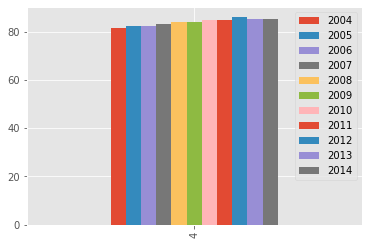

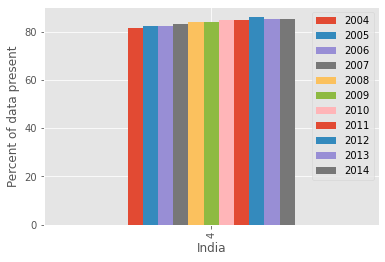

In [134]:
# The another Country is India
# plt.figure(figsize=(50,5))
# new_df.plot(x=)
# plt.title('Years')
# plt.ylabel('Percent of data present')
# plt.show()
EdStats_new = (advanced_df.loc[:,'2004':'2014'])
plt.figure(figsize=(20,10))
# plt.subplot()
advanced_df.plot(kind='bar')
new_df.plot(kind='bar')
plt.xlabel('India')
plt.ylabel('Percent of data present')
plt.show()

<Figure size 1440x720 with 0 Axes>

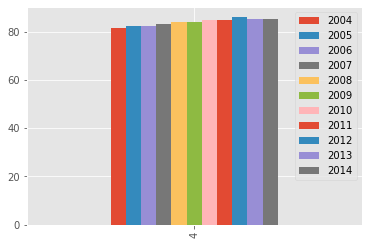

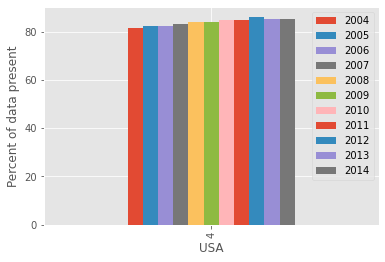

In [135]:
# Another one is USA
EdStats_new = (advanced_df.loc[:,'2004':'2014'])
plt.figure(figsize=(20,10))
# plt.subplot()
advanced_df.plot(kind='bar')
new_df.plot(kind='bar')
plt.xlabel('USA')
plt.ylabel('Percent of data present')
plt.show()

This is the data that are present in between these years

### Let's try to focus on an important indicator PISA.....analyses the PISA.

In [136]:
#           Important indicators 
#               PISA
# PISA: 15-year-olds by mathematics proficiency level (%). Below Level 1
# PISA: 15-year-olds by mathematics proficiency level (%). Level 1
# PISA: 15-year-olds by mathematics proficiency level (%). Level 2
# PISA: 15-year-olds by mathematics proficiency level (%). Level 3
# PISA: 15-year-olds by mathematics proficiency level (%). Level 4
# PISA: 15-year-olds by mathematics proficiency level (%). Level 5
# PISA: 15-year-olds by mathematics proficiency level (%). Level 6

### After using all the Visualizing technique. We analyse all the data.
 
Now taking the mean and median of all the data that are present. 

In [137]:
#Calculating mean for all Data

first_country=Edstats_data_df[(Edstats_data_df['Country Name'] =='India' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3 ]].mean().dropna().to_frame()


# (Edstats_data_df[(Edstats_data_df['Country Name'] =='Zimbabwe' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[countryCols[i] for i in range(len(countryCols)) if i>3 ]].median().dropna()).mean()

In [138]:
second_country_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='Zimbabwe' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i >3]].mean().dropna().to_frame()
first_country_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='India' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i>3 ]].mean().dropna().to_frame()
third_country_df=Edstats_data_df[(Edstats_data_df['Country Code'] =='BHR' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i>3 ]].mean().dropna().to_frame()
fourth_country_df=Edstats_data_df[(Edstats_data_df['Country Code'] =='BLZ' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i>3 ]].mean().dropna().to_frame()
fifth_country_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='Belgium' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i>3 ]].mean().dropna().to_frame()
sixth_country_df=Edstats_data_df[(Edstats_data_df['Country Name'] =='Algeria' )  & (Edstats_data_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[column_list[i] for i in range(len(column_list)) if i>3 ]].mean().dropna().to_frame()

Text(0.5, 0, 'Series Code')

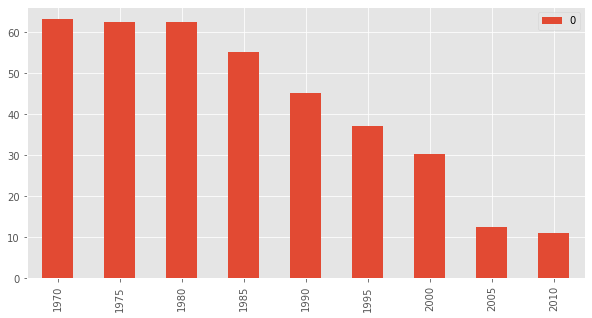

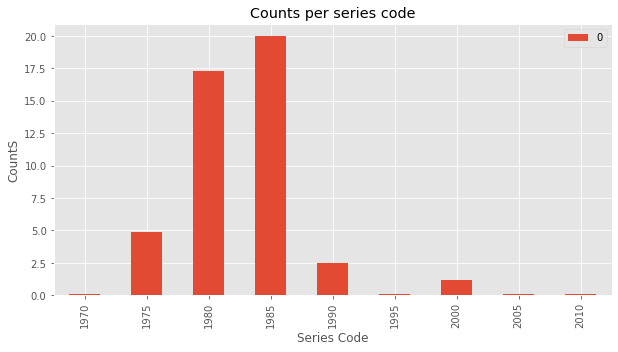

In [139]:
#Meadian Value graph printed for Country India and Zimbabwe

plt.rcParams['figure.figsize'] = (10, 5)
first_country_df.plot(kind='bar')
second_country_df.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

Text(0.5, 0, 'Series Code')

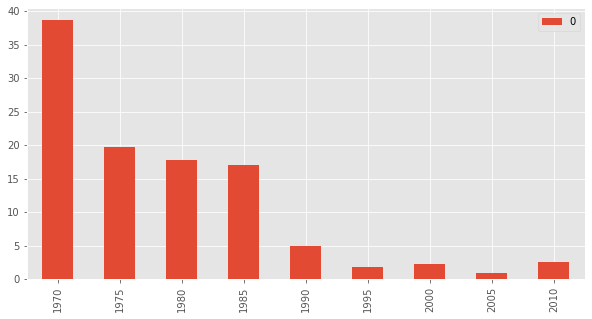

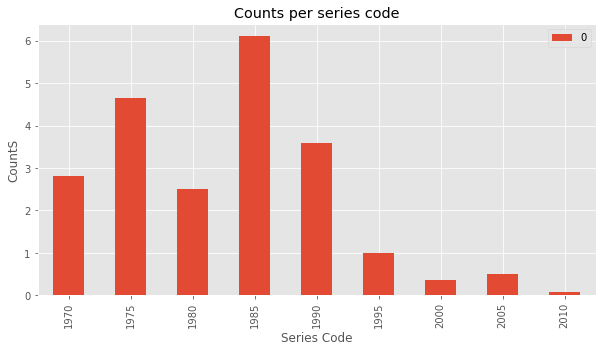

In [140]:
plt.rcParams['figure.figsize'] = (10, 5)
third_country_df.plot(kind='bar')
fourth_country_df.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

Text(0.5, 0, 'Series Code')

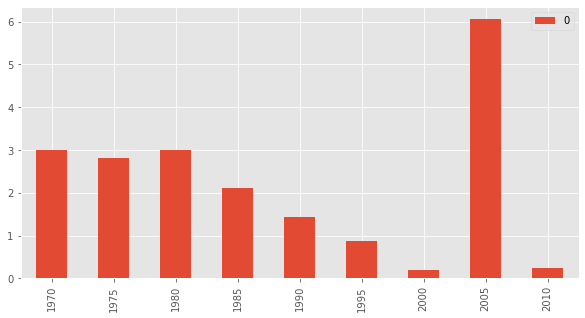

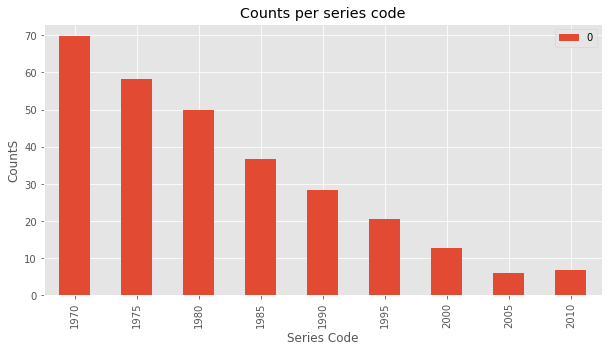

In [141]:
plt.rcParams['figure.figsize'] = (10, 5)
fifth_country_df.plot(kind='bar')
sixth_country_df.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

We considered this Indicator as it has the most percentage of data in it....

In [142]:
#fetching country Names:
Country_Name=set()
for i in Edstats_data_df['Country Name']:
  Country_Name.add(i)
Country_Name

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',


In [143]:
# Plotting in graph of country with max data :
CN=list(Country_Name)
length=[]
countries=[]
  
for i in range(len(Country_Name)):
  countryComparision_df=Edstats_data_df[(Edstats_data_df['Country Name'] == CN[i])][[column_list[i] for i in range(len(column_list)) if i >34 and i<51 ]].reset_index()
  EdStats_new=(countryComparision_df.count(axis=1))
  for i in range(len(EdStats_new)):
    length.append(EdStats_new[i])
  countries.append((sum(length)/(3665*22*242)*100))

In [144]:
countryComparision_df

,index,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,40315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40319,6.244035e+01,6.560566e+01,6.855698e+01,7.097468e+01,7.341411e+01,7.557642e+01,7.678999e+01,7.885051e+01,7.919689e+01,7.906478e+01,8.058290e+01,8.145362e+01,8.225955e+01,8.252707e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,43975,1.961489e+07,1.961489e+07,1.961489e+07,1.961489e+07,1.959731e+07,1.959731e+07,1.959731e+07,1.959731e+07,1.959731e+07,1.959731e+07,1.959731e+07,1.959731e+07,1.959731e+07,1.959731e+07,NaN,NaN
3661,43976,6.498860e+01,6.498860e+01,6.498860e+01,6.498860e+01,7.327536e+01,7.327536e+01,7.327536e+01,7.327536e+01,7.327536e+01,7.327536e+01,7.327536e+01,7.327536e+01,7.327536e+01,7.327536e+01,NaN,NaN
3662,43977,5.844808e+01,5.844808e+01,5.844808e+01,5.844808e+01,6.952116e+01,6.952116e+01,6.952116e+01,6.952116e+01,6.952116e+01,6.952116e+01,6.952116e+01,6.952116e+01,6.952116e+01,6.952116e+01,NaN,NaN
3663,43978,8.100000e-01,8.100000e-01,8.100000e-01,8.100000e-01,9.000000e-01,9.000000e-01,9.000000e-01,9.000000e-01,9.000000e-01,9.000000e-01,9.000000e-01,9.000000e-01,9.000000e-01,9.000000e-01,NaN,NaN


In [145]:
country_datapercentage=zip(Country_Name,countries)

In [146]:
list(country_datapercentage)

[('Guinea', 0.07520322911616474),
 ('Mongolia', 0.1562386290606105),
 ('Angola', 0.2050535913974968),
 ('Brazil', 0.28211204532898465),
 ('Guyana', 0.355070554917217),
 ('Peru', 0.44329623225364717),
 ('Guinea-Bissau', 0.48860574217705),
 ('Timor-Leste', 0.5489876724923459),
 ('Turkey', 0.6353581250134529),
 ('Denmark', 0.7235120533238761),
 ('South Asia', 0.7664384705977616),
 ('Middle income', 0.8102771254880216),
 ('Germany', 0.8916302711190696),
 ('Turkmenistan', 0.9344900642973771),
 ('Bahrain', 1.0078175688765023),
 ('American Samoa', 1.0272871795765373),
 ('Macao SAR, China', 1.1115974100651582),
 ('Cuba', 1.1986238536811862),
 ('Upper middle income', 1.2425445074583112),
 ('Chad', 1.3104652104347683),
 ('Colombia', 1.4043949353387528),
 ('Comoros', 1.4583553278264247),
 ('Sudan', 1.5169435324915463),
 ('Ghana', 1.6046413419937824),
 ('Kyrgyz Republic', 1.6966440930564368),
 ('French Polynesia', 1.7203263965691666),
 ('Gibraltar', 1.7423994719271685),
 ('Malaysia', 1.81970904744

In [147]:
data=dict(country_datapercentage)
k =data.keys()
v =data.values()

In [148]:
k
# plt.figure(figsize=(35,10))
# plt.subplot()
# plt.xticks(rotation=90)
# plt.bar(k, v)
# plt.title("Countries Data present")

dict_keys([])

#### Main objects from which we did all the different analysis

In [149]:
cols_to_keep = ['Country Name','Country Code','Indicator Name','Indicator Code']

In [150]:
Edstats_data_df[cols_to_keep]

,Country Name,Country Code,Indicator Name,Indicator Code
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR
...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS


### Extra Observations

* Total 195 countries are present in the world but 242 are given as per the dataset.
* Some datasets were not useful for our analyses like EdtatsFootNote and EdstatsCountry-Series

### Summary

* Fake columns name like Unnamed having all zero values deleted from all datasets